# Decision Tree and Random Forest


## I. Decision Tree

In this experiment, we will use the built-in function in scikit-learn library to build a decision tree classifier model. 

**Dataset**: the dataset we use is the well-known Iris dataset, which contains information of 3 classes of the iris plant (Iris Setosa, Iris Versicolour, Iris Virginica) with the following 4 features: sepal length; sepal width; petal length; petal width. There are totally 150 examples in the dataset, 75% of which will be used to train our model while remaining to test our model.

**Note**: In the code, we will use digital label {1,2,3} to represent class label {Iris Setosa, Iris Versicolour, Iris Virginica}.

**Task**: to predict the class of iris plant based on the features.

### 1. Import Library

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 2. Load dataset

In [2]:
#Loading the iris data
iris = load_iris()

print('Features in the data: ', iris.feature_names)
print('Classes to predict: ', iris.target_names)

# For more details about this dataset, uncomment code below:
# print(data.DESCR)

#Extracting features
X = iris.data
### Extracting target/ class labels
y = iris.target

print('Number of examples in the data:', X.shape[0])

#Using the train_test_split to create train(75%) and test(25%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

# visualize one example in training set
print(f'E.x, A training example with feature: {X_train[0]} belongs to Class {y_train[0]}')

Features in the data:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes to predict:  ['setosa' 'versicolor' 'virginica']
Number of examples in the data: 150
E.x, A training example with feature: [6.9 3.1 5.1 2.3] belongs to Class 2


### 3. Build Decision-Tree classifier using Library

We will import the DecisionTreeClassifier function from the sklearn library. Recall that we need to specify the attribute selection measures for Decision-Tree algorithm. In this experiment, we will set this '**criterion**' to 'entropy', i.e., information gain.

In [3]:
#Importing the Decision tree classifier from the sklearn library.
tree_params={
    'criterion':'entropy'
}
clf = tree.DecisionTreeClassifier( **tree_params )

### 4. Train and predict
Next, we will train and test the classifier on the corresponding dataset. You will be asked to complete the train and test function.

In [5]:
#Training the decision tree classifier on training set. 
# Please complete the code below.
clf.fit(X_train,y_train)


#Predicting labels on the test set.
# Please complete the code below.
y_pred =  clf.predict(X_test)

print(f'Test feature {X_test[0]}\n True class {y_test[0]}\n predict class {y_pred[0]}')

Test feature [5.4 3.7 1.5 0.2]
 True class 0
 predict class 0


### 5. Evaluation
We will now evaluate the predicted classes using some metrics. For this case, we will use 'accuracy_score' to calculate the accuracy of the predicted labels.

In [6]:
#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9473684210526315


You are supposed to see accuracy around:

Accuracy Score on train data:  1.0

Accuracy Score on test data:  0.9473684210526315

### 6. Visualise Tree
#### 6.1 Plot tree structure
We can visualise the tree using matplot package.

In [9]:
def visualise_tree(tree_to_print):
    plt.figure()
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
    tree.plot_tree(tree_to_print,
               feature_names = iris.feature_names,
               class_names=iris.target_names, 
               filled = True,
              rounded=True)
    plt.show()
    
# def visualise_tree(tree_to_print): 
#     dot_data = tree.export_graphviz(tree_to_print, out_file=None, 
#                       feature_names=iris.feature_names,  
#                       class_names=iris.target_names,  
#                       filled=True, rounded=True,  
#                       special_characters=True) 
#     graph = ghz.Source(dot_data) 
#     return graph


In [11]:
visualise_tree(clf)

<Figure size 432x288 with 0 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 8000x8000 with 1 Axes>

#### 6.2 Tree structure explanation
1. The 1st line indicates the conditions in internal node (Leaf nodes do not have this line);
2. The 2nd line indicates the Attribute Selection Measures, which could be Information Gain, Gini Index, etc.
3. The 3rd line 'samples' is the number of observations;
4. The 4th line 'values' is the the distribution of these samples in various classes.
5. The 5th line is the prediction in this node.

#### 6.3 Visualize decision boundary
Plot the decision surface of a decision tree would also help you understand how it works.

We train the decision tree with each pair of iris features, then plot the decision boundary to understand how it works with each feature. If this code is difficult for you, just **feel free to skip it**. You only need to know it can plot the decision boundary given the tree parameters.

In [12]:
def visualise_decision_boundary(**tree_params):
    # Parameters
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02
    plt.figure(figsize=(10,5),dpi=100)
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X_visualise = X[:, pair]
        y_visualise = y

        # Train
        clf = tree.DecisionTreeClassifier(**tree_params).fit(X_visualise, y_visualise)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X_visualise[:, 0].min() - 1, X_visualise[:, 0].max() + 1
        y_min, y_max = X_visualise[:, 1].min() - 1, X_visualise[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X_visualise[idx, 0], X_visualise[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

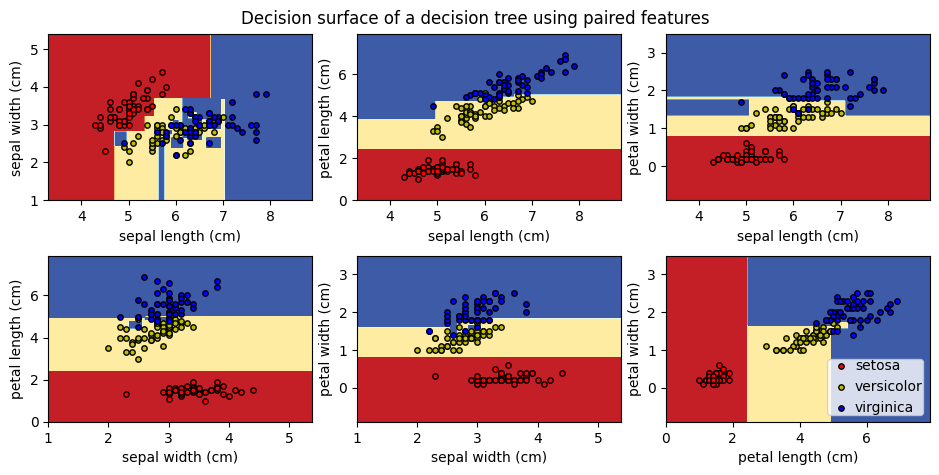

In [13]:
visualise_decision_boundary(**tree_params)

### 7. Hyperparameter Tuning
Next, we will tune the parameters of the decision tree to increase its accuracy. One of those parameters is '**min_samples_split**', which is the minimum number of samples required to split an internal node. Its default value is equal to 2 because we cannot split on a node containing only one example/ sample. In following experiment, we set it to 50.

In [14]:
tree_params={
    'criterion': 'entropy',
    'min_samples_split':50
}
clf = tree.DecisionTreeClassifier(**tree_params)
clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

Accuracy Score on train data:  0.9553571428571429
Accuracy Score on the test data:  0.9736842105263158


You are supposed to see accuracy around:

Accuracy Score on train data:  0.9553571428571429
Accuracy Score on the test data:  0.9736842105263158

We can see that the accuracy on the test set increased from 0.947 to 0.974, while it decreased on the training set from 1.0 to 0.955. This is because increasing the value of the min_sample_split **smoothens** the decision boundary and thus prevents it from overfitting. A better way to understand this is to plot the tree structure and its decision boundary.

<Figure size 432x288 with 0 Axes>

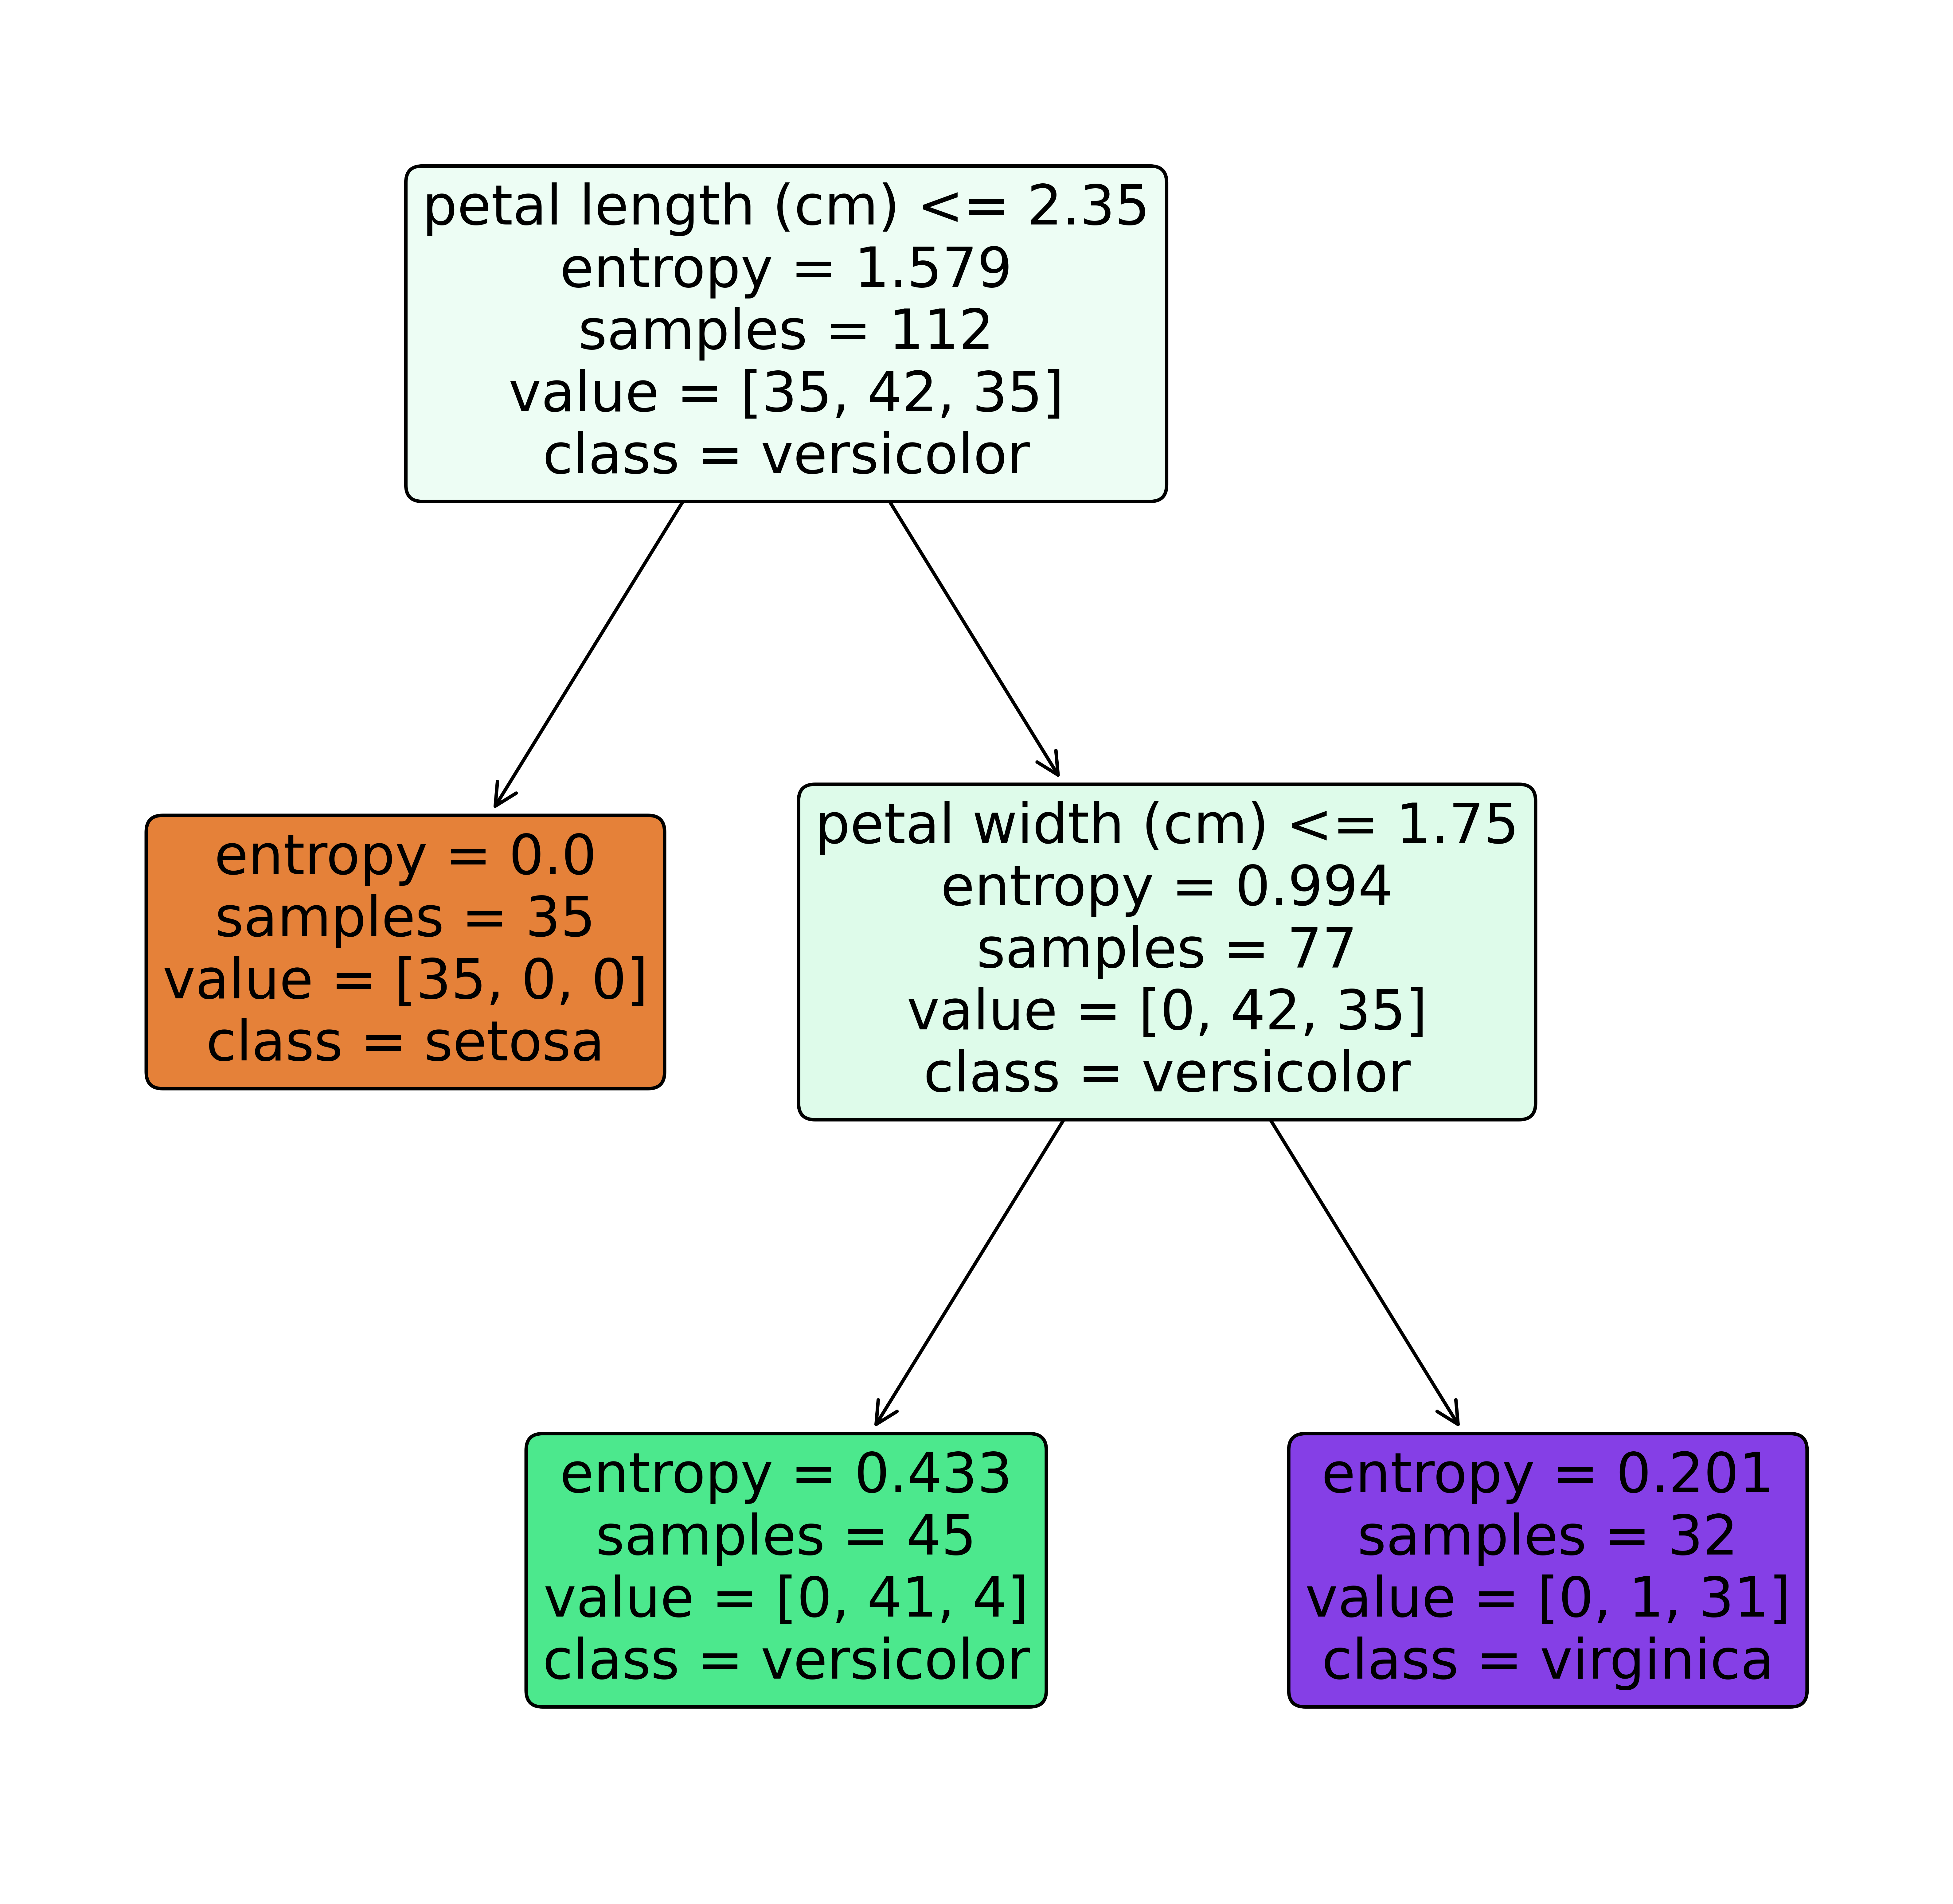

In [11]:
visualise_tree(clf)

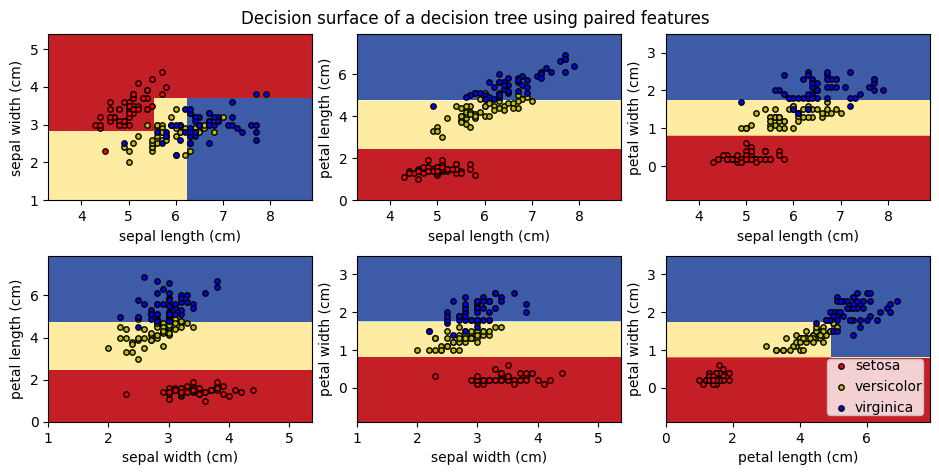

In [15]:
visualise_decision_boundary(**tree_params)

Now you can compare the tree structure and decision boundary with previous one. As you can see, ***the tree is more shallow and simpler compared to previous one, and the decision boundary is more smoother***.

You may tune other parameters of the decision tree and check how they affect the tree structure and its decision boundary in a similar way.

## II. Random Forest

In this experiment, you will see how to use built-in functions implement the random forest algorithm.

### 1. Train and test

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
# Complete the code below.
clf.fit(X_train,y_train)

# prediction on test set
# complete code below.
y_pred=clf.predict(X_test)

print(f'Test feature {X_test[0]}\n True class {y_test[0]}\n predict class {y_pred[0]}')

Test feature [5.4 3.7 1.5 0.2]
 True class 0
 predict class 0


### 2. Evaluation
As before, we test the accuracy in test dataset.

In [21]:
print("Random Forest test Accuracy:", accuracy_score(y_test, y_pred))

Random Forest test Accuracy: 0.9736842105263158


You are supposed to see accuracy around:

Random Forest test Accuracy: 0.9736842105263158

### 3. Random Forest Visualisation
As random forest is set of trees, we can visualise random forest by plotting its constituent trees. In the code below, we plot 5 trees from the forest. You are supposed to see various tree structures.

In [ ]:
for index in range(0, 5):
    visualise_tree(clf.estimators_[index])

### 4. Important features
Random forest algorithm provides a good feature importance indicator, by computing the relevance score of each feature in the training phase, then scaling it such that all feature scores sum up to 1. We will show the score by utilising built-in functions.

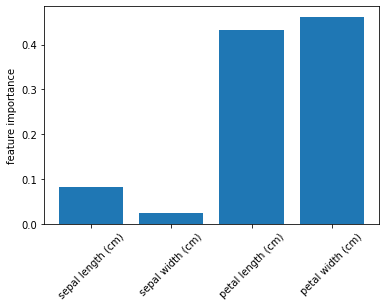

In [23]:
feature_name= iris.feature_names
feature_importance=clf.feature_importances_
plt.figure()
plt.bar(feature_name,feature_importance)
plt.xticks(rotation=45)
plt.ylabel('feature importance')
plt.show()

Above figure shows that 'sepal width' has very low feature importance, thus it is natural to see what performance we can get if we remove it.

Because 'sepal width' is the 2nd features in our data, we only choose 1st, 3rd and 4th features.

In [24]:
# drop least important feature
X=iris.data[:,[0,2,3]]

# split data again
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [25]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
# complete code below.
clf.fit(X_train,y_train)

# prediction on test set
# complete code below.
y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("After removing sepal width, Random Forest Accuracy:",accuracy_score(y_test, y_pred))

After removing sepal width, Random Forest Accuracy: 0.9473684210526315


You are supposed to see accuracy around:

After removing sepal width, Random Forest test Accuracy: 0.9473684210526315

# Congrats!
Now you have learned how to implement Decision tree and Ranom Forest algorithms. There are of course various interesting points we do not cover here, such as comparing the 2 algorithms and fine tuning various hyper-parameters of those algorithms. With the skills you learned above, you can try it yourselves.